In [ ]:
# 查看当前kernel下已安装的包  list packages
!pip list --format=columns

In [ ]:
# 安装拓展包
pip install some_package --user

In [3]:
# 举例：安装sklearn某依赖库
!pip install jieba wordcloud --user
!wget http://d.xiazaiziti.com/en_fonts/fonts/s/SimHei.ttf

Looking in indexes: https://mirrors.aliyun.com/pypi/simple
     |████████████████████████████████| 366 kB 3.9 MB/s            
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [ ]:
# 举例：绘图案例 an example of matplotlib
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn
from IPython.display import display, clear_output
import time
x = np.linspace(0,5)
f, ax = plt.subplots()
ax.set_title("Bessel functions")

for n in range(1,10):
    time.sleep(1)
    ax.plot(x, jn(x,n))
    clear_output(wait=True)
    display(f)

# close the figure at the end, so we don't get a duplicate
# of the last plot
plt.close()

In [10]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import jieba
import re  # 正则表达式库
from collections import Counter # 词频统计库
import wordcloud  # 词云展示库
from PIL import Image  # 图像处理库
import matplotlib
import matplotlib.pyplot as plt  # 图像展示库
 
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False
 
# 1 数据加载
data = pd.read_csv('earphone_sentiment.csv')
data1 = pd.DataFrame(data)
 
# 2 取content列做分析
data2 = data1.loc[:, ['content']]
data2.to_csv('content.csv', index=True)


In [7]:
# 3 生成txt文件
data3 = pd.read_csv('content.csv', encoding='utf-8')
with open('content.txt', 'a+', encoding='utf-8') as f:
    for line in data3.values:
        f.write((str(line[0]) + '\t' + str(line[1]) + '\n'))
 
# 4 读取txt文件
fn = open('content.txt', 'r', encoding='utf-8')
string_data = fn.read()
fn.close()


In [9]:
# 5 采用正则化文本预处理
pattern = re.compile(u'\t|\n|\.|-|:|;|\)|\(|\?|"')
string_data = re.sub(pattern, '', string_data)

# 6 使用jieba文本分词
seg_list_exact = jieba.cut(string_data, cut_all=False)
# 7 过滤自定义去除词库
remove_words = [u'的', u'，', u'和', u'是', u'随着', u'对于', u'对', u'等', u'能', u'都', u'。', u' ', u'、', u'中', u'在', u'了',
                u'通常', u'如果', u'我们', u'需要', u'我', u'也', u'？', u'不', u'就', u'有', u'\xa0', u'很', u'你', u'还是', u'吧', u'这',
                u'还', u'推', u'！', u'就是', u'说', u'上', u'一个', u'啊', u'吗', u'…', u',', u'~', u'个', u'的话', u'到', u'那', u'下',
                u'一下']  # 自定义去除词库

object_list = []
for word in seg_list_exact:
    if word not in remove_words:
        object_list.append(word)
 
object_list[:20]

['0Silent',
 'Angel',
 '期待',
 '您',
 '光临',
 '共赏',
 '美好',
 '声音',
 '1',
 '只',
 'HD650',
 '1k',
 '失真',
 '左声道',
 '右声道',
 '6',
 '倍',
 '左右',
 '超出',
 '官方']

In [11]:
# 8 词频统计,找出高频无效词
word_counts = Counter(object_list)
word_counts_top100 = word_counts.most_common(100)
word_counts_top100 = str(word_counts_top100)
print('前100词云', word_counts_top100)

前100词云 [('听', 1943), ('耳机', 1788), ('好', 1659), ('可以', 1307), ('声音', 1243), ('用', 1161), ('没', 1055), ('这个', 1050), ('买', 895), ('没有', 789), ('感觉', 786), ('比', 752), ('不错', 750), ('要', 712), ('不是', 704), ('过', 660), ('什么', 655), ('多', 628), ('会', 613), ('大', 612), ('楼主', 603), ('线', 598), ('觉得', 588), ('问题', 574), ('看', 565), ('比较', 552), ('耳放', 546), ('现在', 532), ('解码', 530), ('但是', 516), ('更', 493), ('平衡', 480), ('但', 470), ('应该', 463), ('人', 443), ('喜欢', 438), ('自己', 428), ('低频', 428), ('知道', 392), ('人声', 390), ('把', 383), ('换', 369), ('再', 367), ('去', 356), ('其实', 355), ('很多', 351), ('+', 347), ('可能', 345), ('高', 342), ('或者', 340), ('出', 339), ('有点', 339), ('想', 338), ('确实', 335), ('不过', 334), ('又', 329), ('啥', 329), ('直接', 328), ('价格', 326), ('[', 325), (']', 325), ('非常', 313), ('挺', 311), ('得', 310), ('二手', 301), ('高频', 300), ('玩', 300), ('好听', 298), ('一样', 297), ('建议', 295), ('还有', 295), ('不会', 293), ('呢', 292), ('650', 287), ('太', 285), ('这种', 285), ('给', 284), ('这么', 284), ('素

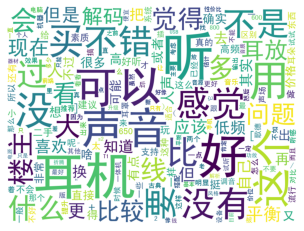

In [24]:
# 9 词频云展示
wc = wordcloud.WordCloud(
        font_path = 'SimHei.ttf',
    #     mask=np.array(Image.open('image.jpg')) ,
        max_words = 200,
        max_font_size = 150,
        background_color = 'white',
        width=800, height=600,
    )
 
wc.generate_from_frequencies(word_counts)
plt.imshow(wc)
plt.axis('off')
plt.show()
wc.to_file('content.jpg')